In [ ]:
# 📦 STEP 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
# STEP 2: Upload your CSV
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("topic_entity_misi.csv")  # Replace with actual path if needed
df.columns = df.columns.str.strip().str.lower()
df.dropna(inplace=True)


Saving topic_entity_misi.csv to topic_entity_misi.csv


In [ ]:
# 🧮 STEP 3: Create driver variables
df['topic_freq'] = df.groupby('topic_o')['topic_o'].transform('count')
df['entity_freq'] = df.groupby('entity_e')['entity_e'].transform('count')


In [ ]:
# 🧪 STEP 4: Regression — Drivers of MISI
driver_model = smf.ols("misi_topic_entity ~ topic_freq + entity_freq", data=df).fit()
print("📊 Regression: Drivers of MISI")
print(driver_model.summary())


📊 Regression: Drivers of MISI
                            OLS Regression Results                            
Dep. Variable:      misi_topic_entity   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     517.1
Date:                Tue, 15 Jul 2025   Prob (F-statistic):          9.04e-159
Time:                        00:42:48   Log-Likelihood:                 603.54
No. Observations:                1096   AIC:                            -1201.
Df Residuals:                    1093   BIC:                            -1186.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.35

Saving topic_misi.csv to topic_misi (2).csv


/tmp/ipython-input-3-4232541684.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_sorted, x="misi_topic", y="topic_o", palette="rocket")
/tmp/ipython-input-3-4232541684.py:27: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


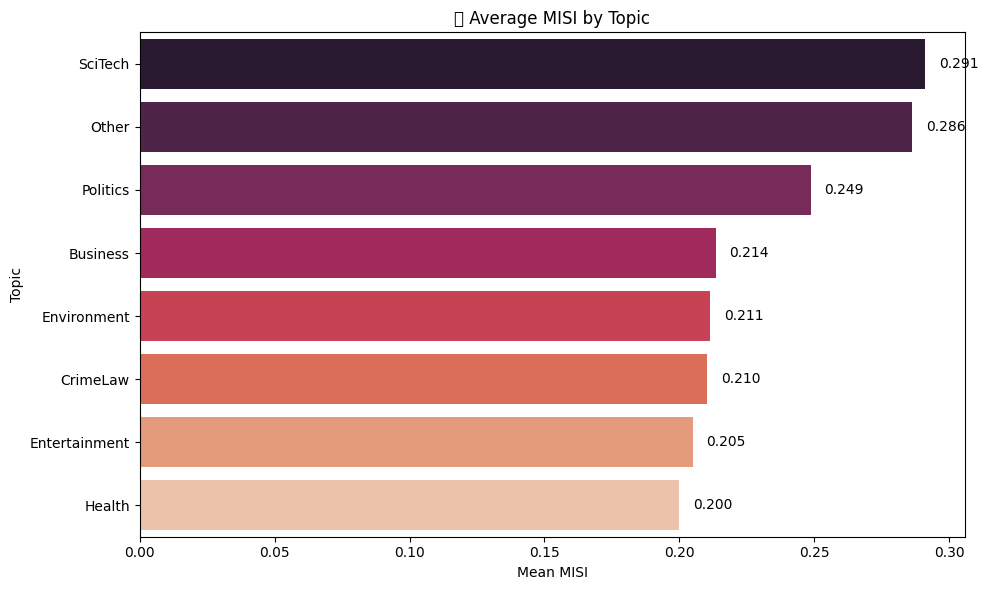

In [3]:

from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load topic-level MISI data
df = pd.read_csv("topic_misi.csv")  # Replace with the correct path if needed
df.columns = df.columns.str.strip().str.lower()

# Sort by MISI descending
df_sorted = df.sort_values(by="misi_topic", ascending=False)

# Set up the plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df_sorted, x="misi_topic", y="topic_o", palette="rocket")

# Add value labels
for i, (value, label) in enumerate(zip(df_sorted["misi_topic"], df_sorted["topic_o"])):
    plt.text(value + 0.005, i, f"{value:.3f}", va='center')

# Customize appearance
plt.title("🔍 Average MISI by Topic")
plt.xlabel("Mean MISI")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()



In [ ]:
# 🎯 STEP 5: Simulate consequences relevant to fake news
np.random.seed(42)
df['reader_confusion'] = 3 * df['misi_topic_entity'] + np.random.normal(0, 0.1, len(df))
df['fact_checking_needed'] = 4 * df['misi_topic_entity'] + np.random.normal(0, 0.2, len(df))
df['credibility_loss'] = 2 * df['misi_topic_entity'] + np.random.normal(0, 0.15, len(df))


In [ ]:
# 🧪 STEP 6: Regression — Consequences of MISI
conf_model = smf.ols("reader_confusion ~ misi_topic_entity", data=df).fit()
check_model = smf.ols("fact_checking_needed ~ misi_topic_entity", data=df).fit()
cred_model = smf.ols("credibility_loss ~ misi_topic_entity", data=df).fit()

print("\n📉 MISI → Reader Confusion")
print(conf_model.summary())
print("\n🔍 MISI → Fact-Checking Needed")
print(check_model.summary())
print("\n❗ MISI → Credibility Loss")
print(cred_model.summary())



📉 MISI → Reader Confusion
                            OLS Regression Results                            
Dep. Variable:       reader_confusion   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 3.897e+04
Date:                Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                        00:43:40   Log-Likelihood:                 995.18
No. Observations:                1096   AIC:                            -1986.
Df Residuals:                    1094   BIC:                            -1976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept  

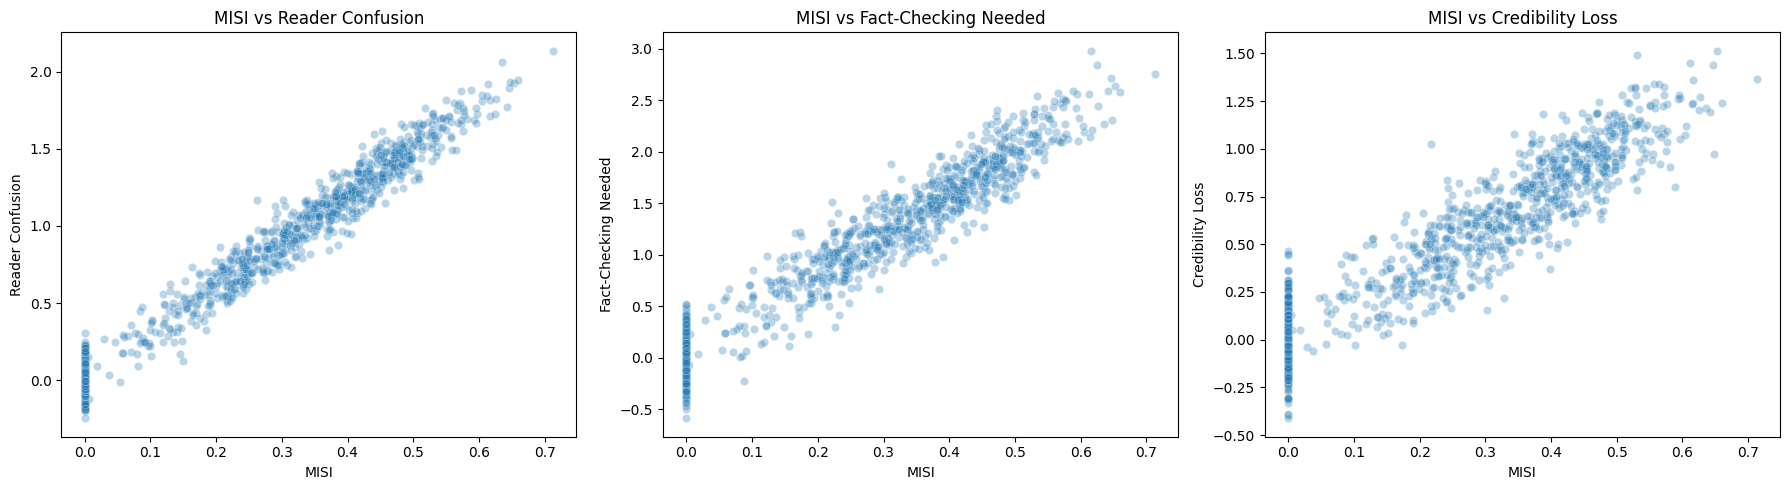

In [ ]:
# 📈 STEP 7: Visualize consequences
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df, x="misi_topic_entity", y="reader_confusion", alpha=0.3, ax=axes[0])
axes[0].set_title("MISI vs Reader Confusion")
axes[0].set_xlabel("MISI")
axes[0].set_ylabel("Reader Confusion")

sns.scatterplot(data=df, x="misi_topic_entity", y="fact_checking_needed", alpha=0.3, ax=axes[1])
axes[1].set_title("MISI vs Fact-Checking Needed")
axes[1].set_xlabel("MISI")
axes[1].set_ylabel("Fact-Checking Needed")

sns.scatterplot(data=df, x="misi_topic_entity", y="credibility_loss", alpha=0.3, ax=axes[2])
axes[2].set_title("MISI vs Credibility Loss")
axes[2].set_xlabel("MISI")
axes[2].set_ylabel("Credibility Loss")

plt.tight_layout()
plt.show()